# San Francisco Housing Rental Analysis

In this assignment, you will perform basic analysis for the San Francisco Housing Market to allow potential real estate investors to choose rental investment properties. 

In [35]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
from pathlib import Path
from dotenv import load_dotenv

%matplotlib inline

In [36]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_TOKEN")

# Set MapBox token
px.set_mapbox_access_token(mapbox_token)

## Load Data

In [37]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function. 

Hint: Use the Pandas groupby function

Optional challenge: Use the min, max, and std to scale the y limits of the chart.

In [38]:
# Calculate the mean number of housing units per year (hint: use groupby) 
sfo_housing_units_per_year = sfo_data.groupby(by=[sfo_data.index])["housing_units"].mean()
sfo_housing_units_per_year

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64


Units Per Year - Min: 372560, Max: 384242, Std: 4206



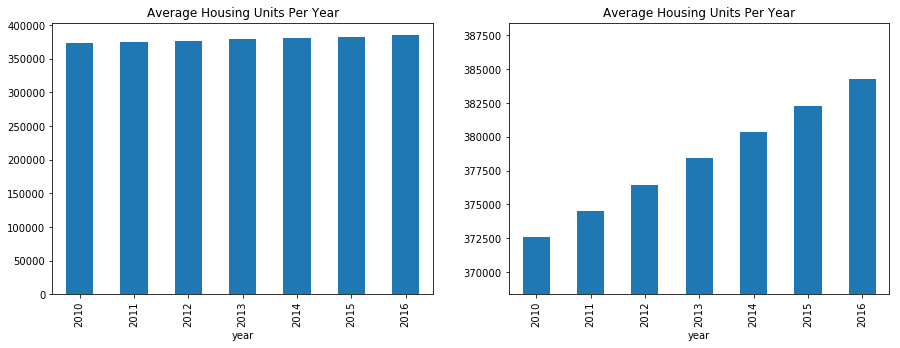

In [39]:
# Get the min, max and standard deviation of mean housing units per year
min_units_per_year = sfo_housing_units_per_year.min()
max_units_per_year = sfo_housing_units_per_year.max()
std_units_per_year = int(sfo_housing_units_per_year.std())
print(f"\nUnits Per Year - Min: {min_units_per_year}, Max: {max_units_per_year}, Std: {std_units_per_year}\n")

# Plot the average housing units per year
fig_housing_units, ax = plt.subplots(ncols=2, figsize=(15,5))
sfo_housing_units_per_year.plot(kind="bar", title="Average Housing Units Per Year", ax=ax[0])
sfo_housing_units_per_year.plot(kind="bar", title="Average Housing Units Per Year", ylim=(min_units_per_year - std_units_per_year, max_units_per_year + std_units_per_year), ax=ax[1])

plt.show()
plt.close(fig_housing_units)

- - - 

## Average Prices per Square Foot

In this section, you will calculate the average gross rent and average sales price for each year. Plot the results as a line chart.

### Average Gross Rent in San Francisco Per Year

In [40]:
# Calculate the average gross rent and average sale price per square foot
sfo_rent_sale = sfo_data.groupby(by=[sfo_data.index])["sale_price_sqr_foot", "gross_rent"].mean()
sfo_rent_sale

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528
2015,632.540352,3739
2016,697.643709,4390



Units Per Year - Min: 1239, Max: 4390, Std: 1172



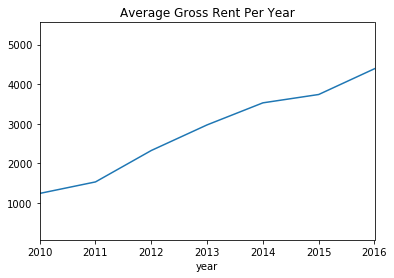

In [41]:
# Plot the Average Gross Rent per Year as a Line Chart 

# Get the min, max and standard deviation of gross rent per year
min_rent_per_year = sfo_rent_sale["gross_rent"].min()
max_rent_per_year = sfo_rent_sale["gross_rent"].max()
std_rent_per_year = int(sfo_rent_sale["gross_rent"].std())
print(f"\nUnits Per Year - Min: {min_rent_per_year}, Max: {max_rent_per_year}, Std: {std_rent_per_year}\n")

# Plot the average housing units per year
fig_rent_per_year, ax = plt.subplots()
sfo_rent_sale["gross_rent"].plot(kind="line", title="Average Gross Rent Per Year", ylim=(min_rent_per_year - std_rent_per_year, max_rent_per_year + std_rent_per_year), ax=ax)

plt.show()
plt.close(fig_rent_per_year)

### Average Sales Price per Year


Units Per Year - Min: 341.90342918010583, Max: 697.6437091165371, Std: 136



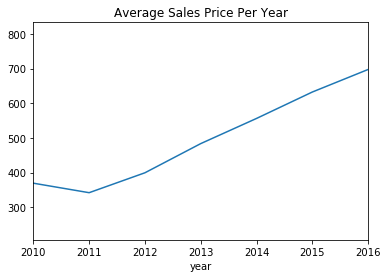

In [42]:
# Plot the Average Sales Price per Year as a line chart

# Get the min, max and standard deviation of gross rent per year
min_price_per_year = sfo_rent_sale["sale_price_sqr_foot"].min()
max_price_per_year = sfo_rent_sale["sale_price_sqr_foot"].max()
std_price_per_year = int(sfo_rent_sale["sale_price_sqr_foot"].std())
print(f"\nUnits Per Year - Min: {min_price_per_year}, Max: {max_price_per_year}, Std: {std_price_per_year}\n")

# Plot the average housing units per year
fig_price_per_year, ax = plt.subplots()
sfo_rent_sale["sale_price_sqr_foot"].plot(kind="line", title="Average Sales Price Per Year", ylim=(min_price_per_year - std_price_per_year, max_price_per_year + std_price_per_year), ax=ax)

plt.show()
plt.close(fig_price_per_year)

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [43]:
# Group by year and neighborhood and then create a new dataframe of the mean values
neighborhood_data = sfo_data.groupby(by=[sfo_data.index, "neighborhood"]).mean()
neighborhood_data.reset_index(inplace=True)
neighborhood_data.head(10)

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
5,2010,Central Sunset,418.172493,372560,1239
6,2010,Corona Heights,369.359338,372560,1239
7,2010,Cow Hollow,569.379968,372560,1239
8,2010,Croker Amazon,165.645730,372560,1239
9,2010,Diamond Heights,456.930822,372560,1239


In [44]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
sale_price_sqr_foot = neighborhood_data[["year", "neighborhood", "sale_price_sqr_foot"]]
sale_price_sqr_foot.hvplot.line(x="year", y="sale_price_sqr_foot", groupby="neighborhood", ylabel="Avg. Sale Price per Square Foot", xlabel="Year", sort_date=True)

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

- - - 

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [45]:
# Getting the data from the top 10 expensive neighborhoods
by_neighborhood = sfo_data.groupby(by=["neighborhood"]).mean().sort_values(by="sale_price_sqr_foot", ascending=False)
by_neighborhood.reset_index(inplace=True)
by_neighborhood.head(10)

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Union Square District,903.993258,377427.50,2555.166667
1,Merced Heights,788.844818,380348.00,3414.000000
2,Miraloma Park,779.810842,375967.25,2155.250000
3,Pacific Heights,689.555817,378401.00,2817.285714
4,Westwood Park,687.087575,382295.00,3959.000000
5,Telegraph Hill,676.506578,378401.00,2817.285714
6,Presidio Heights,675.350212,378401.00,2817.285714
7,Cow Hollow,665.964042,378401.00,2817.285714
8,Potrero Hill,662.013613,378401.00,2817.285714
9,South Beach,650.124479,375805.00,2099.000000


In [46]:
# Plotting the data from the top 10 expensive neighborhoods
by_neighborhood_top10 = by_neighborhood.head(10)
by_neighborhood_top10.hvplot.bar(x="neighborhood", y="sale_price_sqr_foot", title="Top 10 Expensive Neighborhood in SFO", ylabel="Avg. Sale Price per Square Foot", xlabel="Neighborhood", rot=90, height=400)

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Parallel Coordinates and Parallel Categories Analysis

In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 

Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
1. Create a Parallel Coordinates Plot
2. Create a Parallel Categories Plot

In [47]:
# Parallel Coordinates Plot
px.parallel_coordinates(by_neighborhood_top10, dimensions=["sale_price_sqr_foot", "housing_units", "gross_rent"], color="sale_price_sqr_foot")

In [48]:
# Parallel Categories Plot
px.parallel_categories(by_neighborhood_top10, color="sale_price_sqr_foot")

- - - 

## Neighborhood Map

In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

### Load Location Data

In [49]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path).drop_duplicates()
df_neighborhood_locations.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean prices per neighborhood

1. Calculate the mean values for each neighborhood
2. Join the average values with the neighborhood locations

In [50]:
# Calculate the mean values for each neighborhood
mean_price = by_neighborhood[["neighborhood", "sale_price_sqr_foot", "gross_rent"]]

In [51]:
# Join the average values with the neighborhood locations
mean_price_with_index = mean_price.set_index("neighborhood")
df_neighborhood_locations_with_index = df_neighborhood_locations.set_index("Neighborhood")

mean_sales_price = (
    pd.concat([mean_price_with_index, df_neighborhood_locations_with_index], axis=1, sort=True)
    .dropna()
    .reset_index()
)
mean_sales_price.head()

,index,sale_price_sqr_foot,gross_rent,Lat,Lon
0,Alamo Square,366.020712,2817.285714,37.791012,-122.402100
1,Anza Vista,373.382198,3031.833333,37.779598,-122.443451
2,Bayview,204.588623,2318.400000,37.734670,-122.401060
3,Bayview Heights,590.792839,3739.000000,37.728740,-122.410980
4,Buena Vista Park,452.680591,2698.833333,37.768160,-122.439330


### Mapbox Visualization

Plot the aveage values per neighborhood with a plotly express scatter_mapbox visualization.

In [52]:
# Create a scatter mapbox to analyze neighborhood info
value_plot = px.scatter_mapbox(
    mean_sales_price,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    title="Average Sale Price Per Square Foot and Gross Rent in San Francisco",
    color_continuous_scale=px.colors.cyclical.IceFire,
    zoom=11.5,
    height=800,
    width=800,
)
value_plot.show()